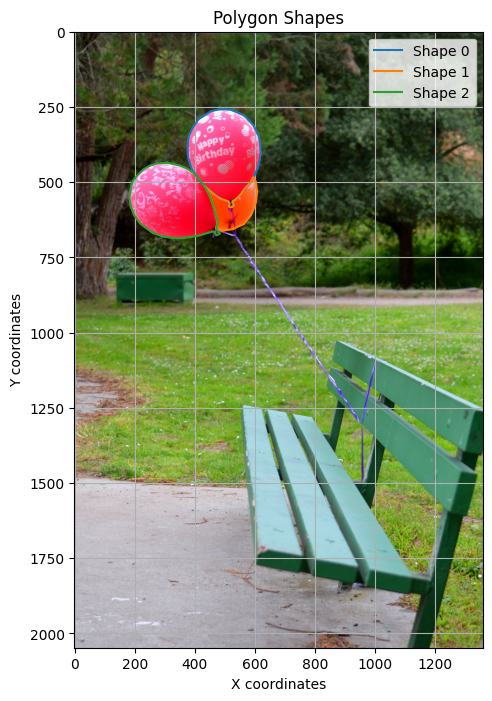

In [20]:
import matplotlib.pyplot as plt

shape_attributes = {
    "0": {
        "all_points_x": [493, 519, 542, 564, 579, 595, 613, 617, 619, 615, 609, 599, 589, 551, 539, 526, 523, 531, 525, 517, 512, 514, 514, 512, 503, 492, 479, 467, 452, 435, 426, 415, 407, 390, 378, 376, 377, 380, 392, 413, 432, 454, 474, 493],
        "all_points_y": [257, 259, 268, 278, 294, 311, 347, 372, 402, 427, 453, 476, 497, 541, 555, 561, 568, 577, 579, 581, 579, 573, 568, 563, 561, 557, 549, 541, 530, 515, 505, 495, 480, 456, 419, 395, 369, 346, 320, 290, 278, 264, 259, 257],
    },
    "1": {
        "all_points_x": [607, 603, 595, 586, 575, 563, 544, 527, 510, 496, 488, 477, 471, 470, 475, 475, 474, 469, 463, 455, 449, 441, 437, 432, 449, 465, 484, 500, 510, 515, 515, 512, 516, 523, 530, 528, 526, 526, 531, 540, 552, 565, 585, 590, 595, 603, 605, 607, 607],
        "all_points_y": [532, 566, 589, 610, 624, 639, 647, 656, 658, 661, 660, 655, 654, 649, 643, 637, 626, 603, 583, 559, 542, 529, 520, 513, 527, 541, 554, 560, 563, 569, 576, 580, 583, 583, 577, 572, 567, 563, 561, 553, 541, 522, 502, 492, 483, 499, 517, 529, 532],
    },
    "2": {
        "all_points_x": [307, 330, 348, 367, 382, 394, 405, 417, 425, 436, 451, 460, 471, 476, 476, 471, 473, 475, 482, 483, 475, 471, 468, 468, 461, 445, 415, 386, 356, 326, 295, 259, 219, 199, 187, 182, 188, 193, 208, 228, 250, 275, 290, 307],
        "all_points_y": [435, 440, 444, 451, 459, 468, 479, 493, 505, 520, 547, 576, 611, 632, 641, 648, 655, 660, 667, 671, 675, 676, 672, 669, 663, 668, 677, 682, 686, 685, 681, 668, 638, 611, 581, 551, 515, 497, 479, 458, 445, 437, 437, 435],
    },
}

plt.figure(figsize=(8, 8))
for key, shape in shape_attributes.items():
    plt.plot(shape["all_points_x"], shape["all_points_y"], label=f"Shape {key}")

plt.title("Polygon Shapes")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
im = plt.imread("images/14666848163_8be8e37562_k.jpg")
plt.imshow(im)
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import json

def coco_to_via(coco_json):
    via_json = {}
    
    # Map category IDs to names
    category_map = {cat["id"]: cat["name"] for cat in coco_json["categories"]}
    
    # Map image IDs to metadata
    image_map = {img["id"]: img for img in coco_json["images"]}
    
    for annotation in coco_json["annotations"]:
        # Get image metadata
        image_id = annotation["image_id"]
        image_info = image_map[image_id]
        
        # Get filename and image size
        filename = image_info["file_name"]
        image_size = image_info["width"] * image_info["height"]  # Placeholder for size
        
        # Prepare VIA-compatible entry if not already present
        if filename not in via_json:
            via_json[f"{filename}{image_size}"] = {
                "fileref": "",
                "size": image_size,
                "filename": filename,
                "base64_img_data": "",
                "file_attributes": {},
                "regions": {}
            }
        
        # Validate and process segmentation
        if "segmentation" not in annotation or not annotation["segmentation"]:
            continue  # Skip if segmentation is missing or empty
        
        segmentation = annotation["segmentation"]
        if isinstance(segmentation, list) and isinstance(segmentation[0], list):
            segmentation = segmentation[0]
        elif isinstance(segmentation, list) and len(segmentation) % 2 == 0:
            pass
        else:
            continue  # Skip malformed segmentations
        
        # Add region information
        region_id = len(via_json[f"{filename}{image_size}"]["regions"])
        via_json[f"{filename}{image_size}"]["regions"][str(region_id)] = {
            "shape_attributes": {
                "name": "polygon",
                "all_points_x": segmentation[::2],  # Extract x-coordinates
                "all_points_y": segmentation[1::2]  # Extract y-coordinates
            },
            "region_attributes": {
                "category": category_map[annotation["category_id"]]
            }
        }
    
    return via_json


# Load COCO JSON
with open("data/floor-plans-dataset/coco-data/test/_coco.json", "r") as file:
    coco_data = json.load(file)

# Convert to VIA JSON
via_data = coco_to_via(coco_data)

# Save the converted VIA JSON
with open("data/floor-plans-dataset/coco-data/test/via_annotations.json", "w") as file:
    json.dump(via_data, file, indent=2)
